In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from tensorflow import keras  # Recommended import for Keras with TensorFlow
import tensorflow as tf
import opendatasets as od




In [2]:
# downloaden datasets
od.download('https://www.kaggle.com/datasets/utkarshx27/heart-disease-diagnosis-dataset')



Skipping, found downloaded files in ".\heart-disease-diagnosis-dataset" (use force=True to force download)


In [3]:
df = pd.read_csv("./heart-disease-diagnosis-dataset/dataset_heart.csv")

display(df.head())



,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


First few rows of the dataset:
   age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0   70     1                4                     130                322   
1   67     0                3                     115                564   
2   57     1                2                     124                261   
3   64     1                4                     128                263   
4   74     0                2                     120                269   

   fasting blood sugar  resting electrocardiographic results  max heart rate  \
0                    0                                     2             109   
1                    0                                     2             160   
2                    0                                     0             141   
3                    0                                     0             105   
4                    0                                     2             121   

   exercise induced angina  old

In [5]:
# print van dataset
print( 'Shape of DataFrame: {}'.format(df.shape))
print (df.loc[1])



Shape of DataFrame: (270, 14)
age                                      67.0
sex                                       0.0
chest pain type                           3.0
resting blood pressure                  115.0
serum cholestoral                       564.0
fasting blood sugar                       0.0
resting electrocardiographic results      2.0
max heart rate                          160.0
exercise induced angina                   0.0
oldpeak                                   1.6
ST segment                                2.0
major vessels                             0.0
thal                                      7.0
heart disease                             1.0
Name: 1, dtype: float64


Missing values per column:
age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64
              age        sex   chest pain type  resting blood pressure  \
count  270.000000  270.000000       270.000000              270.000000   
mean    54.433333    0.677778         3.174074              131.344444   
std      9.109067    0.468195         0.950090               17.861608   
min     29.000000    0.000000         1.000000               94.000000   
25

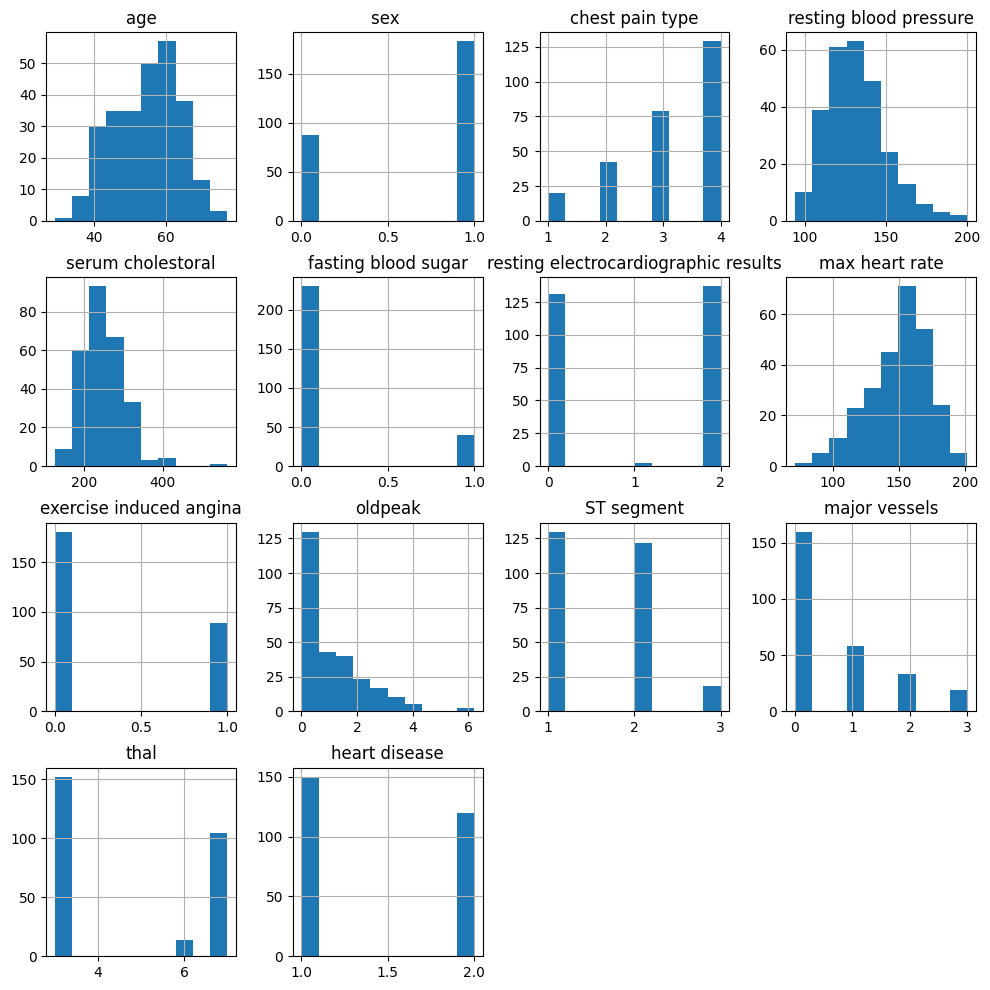

In [6]:
# Controleer op ontbrekende waarden
print("Missing values per column:")
print(df.isna().sum())

# Verwijder rijen met ontbrekende waarden
df_cleaned = df.dropna()

# Controleer op ongeldige waarden door beschrijvende statistieken te bekijken
print(df_cleaned.describe())

# Na opschoning kun je verder gaan met je analyse
print('Shape of cleaned DataFrame:', df_cleaned.shape)


# Visualisatie voorbeeld
df_cleaned.hist(figsize=(12, 12))
plt.show()



In [7]:
data = df.dropna(axis=0)
data.loc[280:]  



,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease


In [8]:
print(data.shape)
print(data.dtypes)



(270, 14)
age                                       int64
sex                                       int64
chest pain type                           int64
resting blood pressure                    int64
serum cholestoral                         int64
fasting blood sugar                       int64
resting electrocardiographic results      int64
max heart rate                            int64
exercise induced angina                   int64
oldpeak                                 float64
ST segment                                int64
major vessels                             int64
thal                                      int64
heart disease                             int64
dtype: object


In [9]:

data = data.apply(pd.to_numeric)
data.dtypes
data.describe()



,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


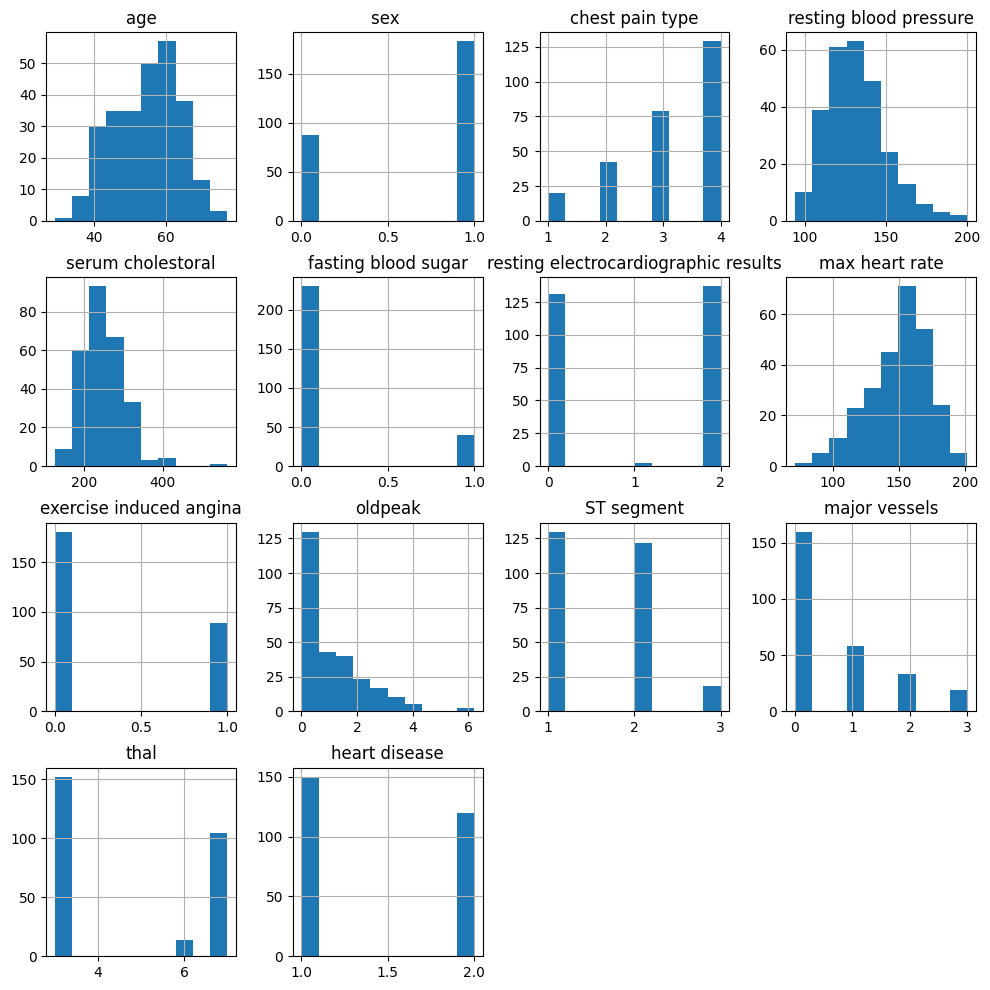

In [10]:
data.hist(figsize = (12, 12))
plt.show()



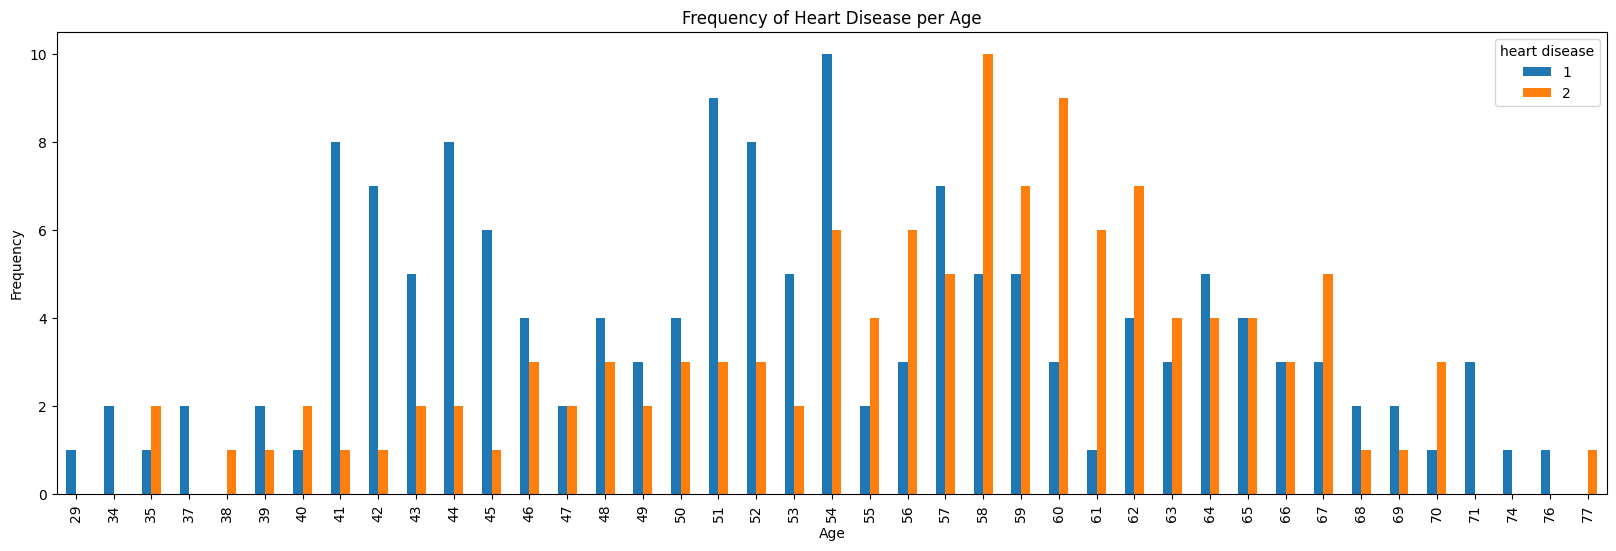

In [11]:
pd.crosstab(df.age, df['heart disease']).plot(kind="bar", figsize=(20, 6))
plt.title('Frequency of Heart Disease per Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



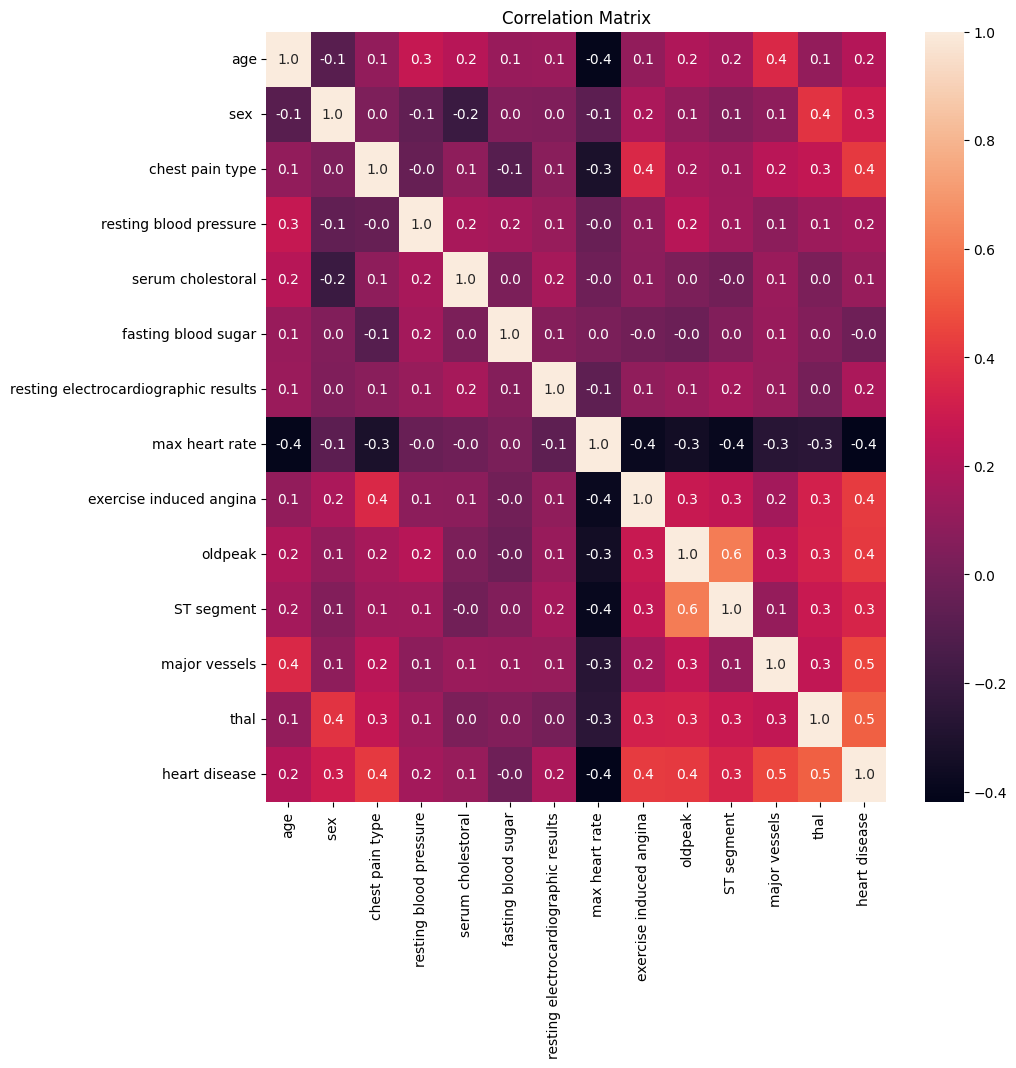

In [12]:
# correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt='.1f')

# plot 
plt.title('Correlation Matrix')
plt.show()



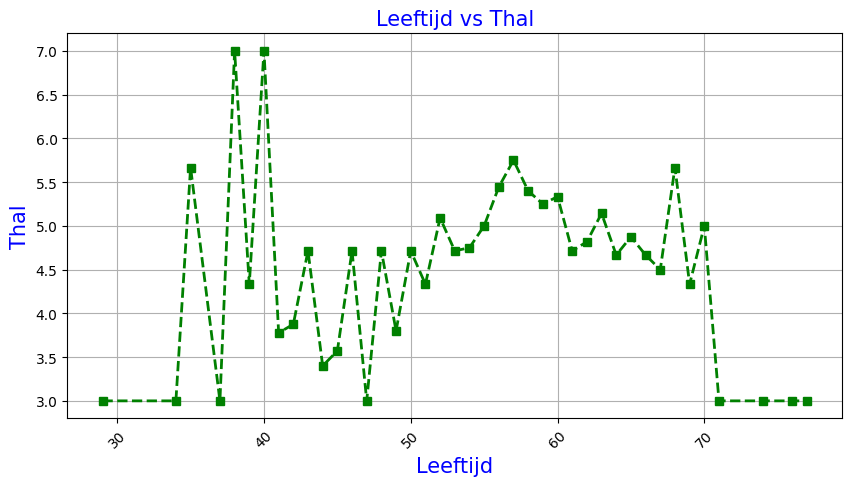

In [13]:
import matplotlib.pyplot as plt

# thal per age
age_unique = sorted(df.age.unique())
age_thal_values = df.groupby('age')['thal'].count().values
mean_thal = []
for i, age in enumerate(age_unique):
    mean_thal.append(sum(df[df['age'] == age].thal) / age_thal_values[i])

# maken van een line plot
plt.figure(figsize=(10, 5))
plt.plot(age_unique, mean_thal, marker='s', color='green', linestyle='--', linewidth=2)

plt.xlabel('Leeftijd', fontsize=15, color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thal', fontsize=15, color='blue')
plt.title('Leeftijd vs Thal', fontsize=15, color='blue')
plt.grid()

plt.show()





In [14]:
from keras.utils import to_categorical

# Importeer de train_test_split functie van sklearn
from sklearn.model_selection import train_test_split

# Definieer X en y
X = np.array(data.drop(columns=['heart disease']))  
y = np.array(data['heart disease']) 



In [15]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std



In [16]:
X[0]



array([ 1.71209356,  0.6894997 ,  0.87092765, -0.07540984,  1.40221232,
       -0.41702883,  0.98166365, -1.75920811, -0.7012223 ,  1.18101235,
        0.67641928,  2.47268219, -0.87570581])

In [17]:
from sklearn import model_selection

# Split de gegevens in trainings- en testdatasets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Controleer de vorm van de datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Converteer de labels naar categorische labels

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])



Shape of X_train: (216, 13)
Shape of X_test: (54, 13)
Shape of y_train: (216,)
Shape of y_test: (54,)
(216, 3)
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# def function voor de keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(3, activation='softmax'))  
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 387 (1.51 KB)
Trainable params: 387 (1.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [19]:
# fit model voor training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)



Epoch 1/50
22/22 [==============================] - 0s 5ms/step - loss: 1.0749 - accuracy: 0.5324 - val_loss: 1.0485 - val_accuracy: 0.5741
Epoch 2/50
22/22 [==============================] - 0s 1ms/step - loss: 1.0155 - accuracy: 0.6250 - val_loss: 0.9870 - val_accuracy: 0.7222
Epoch 3/50
22/22 [==============================] - 0s 1ms/step - loss: 0.9475 - accuracy: 0.7037 - val_loss: 0.9119 - val_accuracy: 0.7778
Epoch 4/50
22/22 [==============================] - 0s 1ms/step - loss: 0.8651 - accuracy: 0.7361 - val_loss: 0.8282 - val_accuracy: 0.7963
Epoch 5/50
22/22 [==============================] - 0s 1ms/step - loss: 0.7710 - accuracy: 0.7870 - val_loss: 0.7421 - val_accuracy: 0.8148
Epoch 6/50
22/22 [==============================] - 0s 1ms/step - loss: 0.7051 - accuracy: 0.7963 - val_loss: 0.6681 - val_accuracy: 0.8333
Epoch 7/50
22/22 [==============================] - 0s 1ms/step - loss: 0.6322 - accuracy: 0.7870 - val_loss: 0.6029 - val_accuracy: 0.8333
Epoch 8/50
22/22 [==

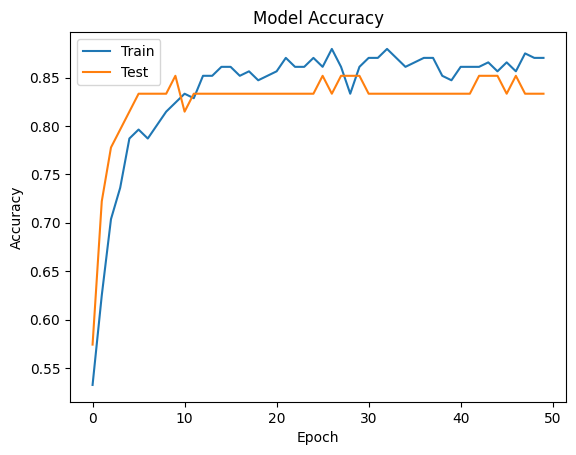

In [20]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

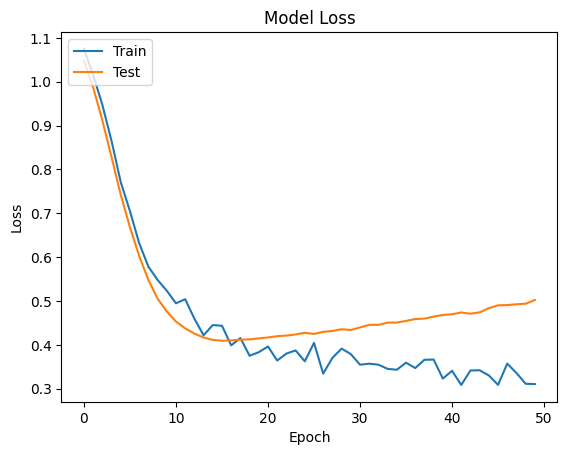

In [21]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [23]:
def create_binary_model():
    # maken van model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                224       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [24]:
# fit binary model op training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6295 - accuracy: 0.9907 - val_loss: 0.5725 - val_accuracy: 1.0000
Epoch 2/50
22/22 [==============================] - 0s 1ms/step - loss: 0.5326 - accuracy: 1.0000 - val_loss: 0.4730 - val_accuracy: 1.0000
Epoch 3/50
22/22 [==============================] - 0s 1ms/step - loss: 0.4356 - accuracy: 1.0000 - val_loss: 0.3705 - val_accuracy: 1.0000
Epoch 4/50
22/22 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 1.0000 - val_loss: 0.2763 - val_accuracy: 1.0000
Epoch 5/50
22/22 [==============================] - 0s 1ms/step - loss: 0.2628 - accuracy: 1.0000 - val_loss: 0.1959 - val_accuracy: 1.0000
Epoch 6/50
22/22 [==============================] - 0s 1ms/step - loss: 0.1997 - accuracy: 1.0000 - val_loss: 0.1341 - val_accuracy: 1.0000
Epoch 7/50
22/22 [==============================] - 0s 1ms/step - loss: 0.1317 - accuracy: 1.0000 - val_loss: 0.0884 - val_accuracy: 1.0000
Epoch 8/50
22/22 [==

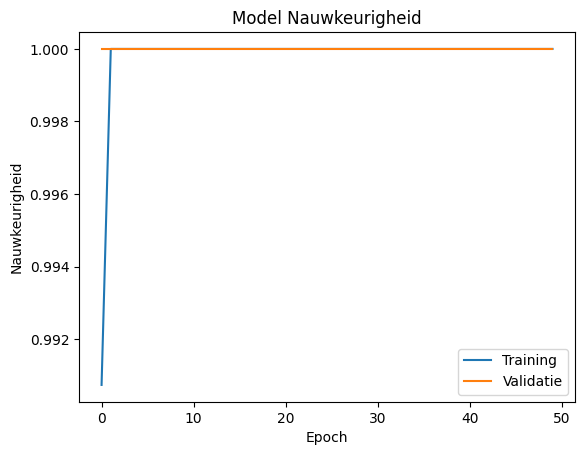

In [25]:
import matplotlib.pyplot as plt

# Model nauwkeurigheid
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy']) 
plt.title('Model Nauwkeurigheid')
plt.ylabel('Nauwkeurigheid')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validatie'])
plt.show()


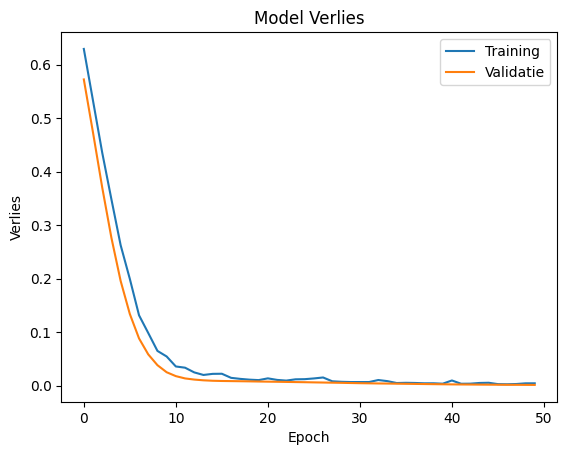

In [26]:
import matplotlib.pyplot as plt

# Model Verlies
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Verlies')
plt.ylabel('Verlies')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validatie'])
plt.show()


In [27]:
# generate classification report voor categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

2/2 [==============================] - 0s 998us/step
Results for Categorical Model
0.8333333333333334
              precision    recall  f1-score   support

           1       0.89      0.80      0.84        30
           2       0.78      0.88      0.82        24

    accuracy                           0.83        54
   macro avg       0.83      0.84      0.83        54
weighted avg       0.84      0.83      0.83        54



In [28]:
# Maak voorspellingen voor het binair model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report voor binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Resultaten voor Binair Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

2/2 [==============================] - 0s 762us/step
Resultaten voor Binair Model
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        54

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [29]:
binary_model.save('binary_heart_disease_model.h5')

C:\Users\Ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
